#### Context

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

#### Attributes

People : <br><br>

ID: Customer's unique identifier<br>
Year_Birth: Customer's birth year<br>
Education: Customer's education level<br>
Marital_Status: Customer's marital status<br>
Income: Customer's yearly household income<br>
Kidhome: Number of children in customer's household<br>
Teenhome: Number of teenagers in customer's household<br>
Dt_Customer: Date of customer's enrollment with the company<br>
Recency: Number of days since customer's last purchase<br>
Complain: 1 if customer complained in the last 2 years, 0 otherwise<br><br>


Products : <br><br>

MntWines: Amount spent on wine in last 2 years<br>
MntFruits: Amount spent on fruits in last 2 years<br>
MntMeatProducts: Amount spent on meat in last 2 years<br>
MntFishProducts: Amount spent on fish in last 2 years<br>
MntSweetProducts: Amount spent on sweets in last 2 years<br>
MntGoldProds: Amount spent on gold in last 2 years<br><br>


Promotion : <br><br>

NumDealsPurchases: Number of purchases made with a discount<br>
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise<br>
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise<br>
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise<br>
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise<br>
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise<br>
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise<br><br>

Place: <br><br>

NumWebPurchases: Number of purchases made through the company’s web site<br>
NumCatalogPurchases: Number of purchases made using a catalogue<br>
NumStorePurchases: Number of purchases made directly in stores<br>
NumWebVisitsMonth: Number of visits to company’s web site in the last month<br>

### Problem Statement 1

Build a unsupervised algorithm to cluster customer data (recommended: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) . <br>
Write a short text of what is the key business takeaway of the recommendation.

#### 1. Importing Libraries

In [1]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")#to hide or ignore the warnings
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, LabelEncoder

#### 2. Data understanding

In [2]:
#Importing the data set. 
data = pd.read_csv('D:\M. Tech in Data Science & Machine Learning\Internship_or_jobs\#####\marketing_campaign.csv', sep="\t")
data.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df=data.copy()#making a copy of the orignal dataframe

In [4]:
df.shape#total 2240 rows and 29 features

(2240, 29)

In [5]:
#There are 2240 rows and 29 features in the Dataset

In [6]:
#Analysing the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
#There are missing values in income

In [8]:
#Looking at the standard measures of the data. 
df.describe()#stastical summary

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [9]:
df.isnull().sum()#checking for null values

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [10]:
#percentage of missing values
(df.isnull().sum()/len(df))*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

In [11]:
#Percentage of missing values in Income is 1%

Box plot for the column :  ID


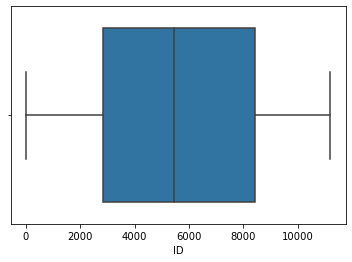

Box plot for the column :  Year_Birth


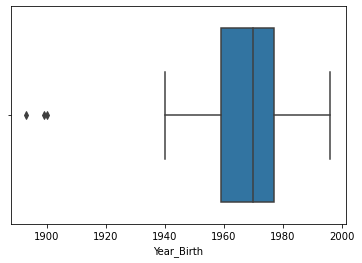

Box plot for the column :  Income


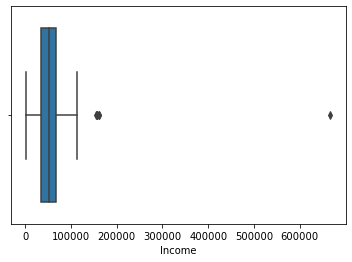

Box plot for the column :  Kidhome


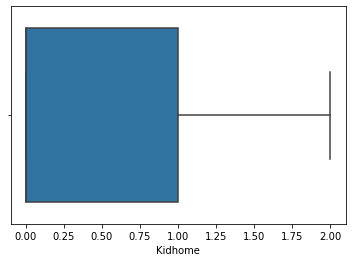

Box plot for the column :  Teenhome


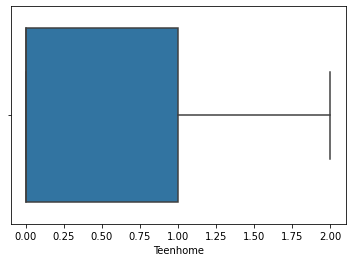

Box plot for the column :  Recency


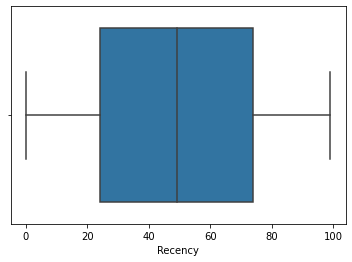

Box plot for the column :  MntWines


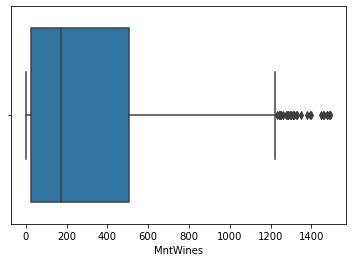

Box plot for the column :  MntFruits


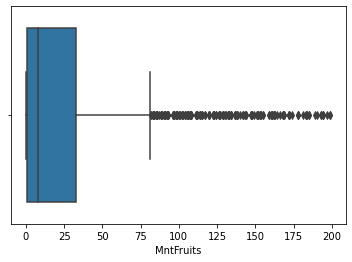

Box plot for the column :  MntMeatProducts


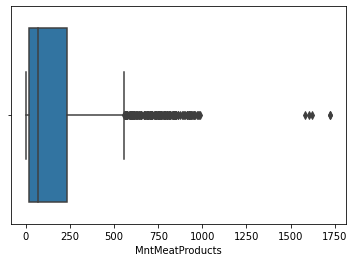

Box plot for the column :  MntFishProducts


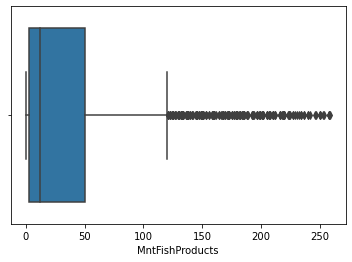

Box plot for the column :  MntSweetProducts


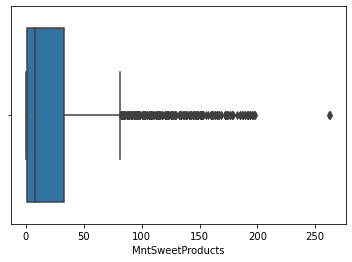

Box plot for the column :  MntGoldProds


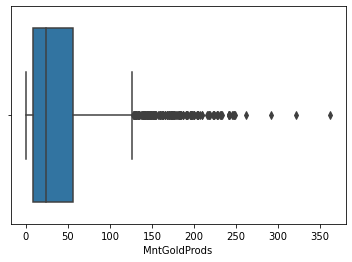

Box plot for the column :  NumDealsPurchases


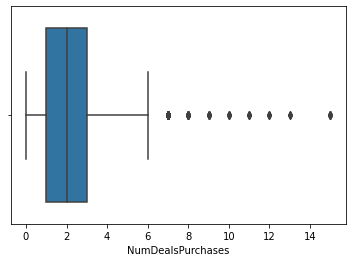

Box plot for the column :  NumWebPurchases


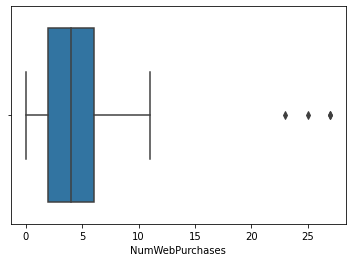

Box plot for the column :  NumCatalogPurchases


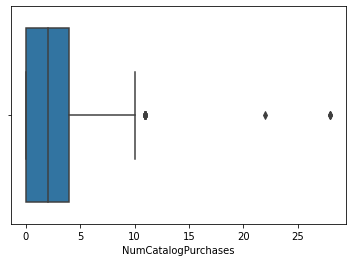

Box plot for the column :  NumStorePurchases


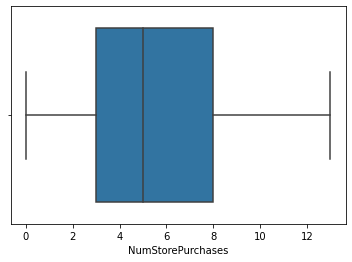

Box plot for the column :  NumWebVisitsMonth


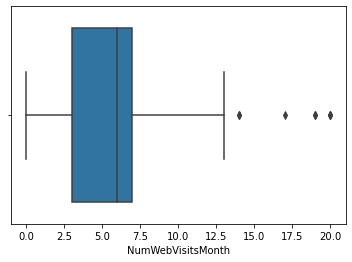

Box plot for the column :  AcceptedCmp3


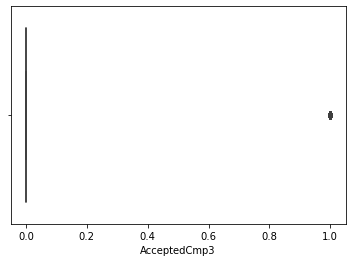

Box plot for the column :  AcceptedCmp4


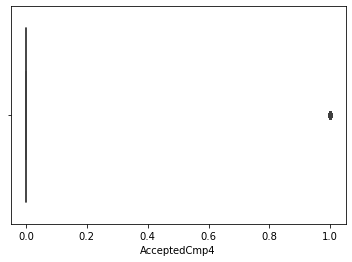

Box plot for the column :  AcceptedCmp5


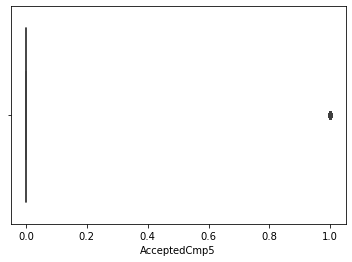

Box plot for the column :  AcceptedCmp1


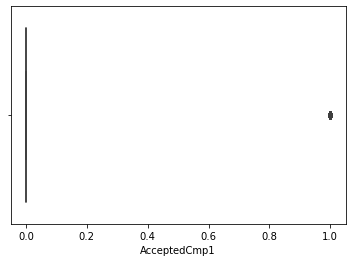

Box plot for the column :  AcceptedCmp2


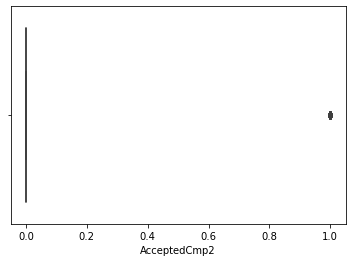

Box plot for the column :  Complain


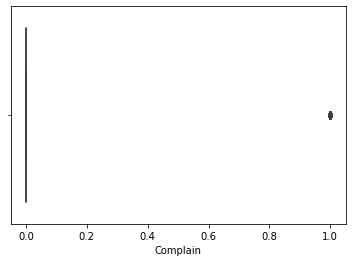

Box plot for the column :  Z_CostContact


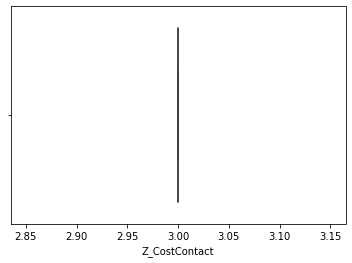

Box plot for the column :  Z_Revenue


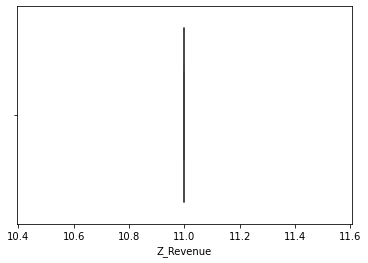

Box plot for the column :  Response


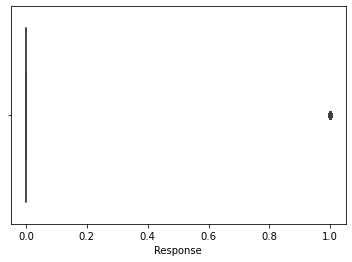

In [12]:
#checking for outliers
for i in df.select_dtypes(include=np.number).columns:
    print('Box plot for the column : ',i)
    sns.boxplot(df[i])
    plt.show()

#### There are some outliers present in some features which can be ignored for now

#### 3. Data Cleaning

In [13]:
df1=df.copy()

In [14]:
#missing values treatment

In [15]:
df1['Income'].skew()#checking the skewness of the data

6.763487372811116

In [16]:
df1['Income'].mean()#mean

52247.25135379061

In [17]:
df1['Income'].median()#median

51381.5

In [18]:
#As there are some outliers present in the Income feature, we will replace the missing values by median

In [19]:
df1.fillna(df['Income'].mean(), inplace=True)

In [20]:
#Amount columns can be combined to form one single columns

In [21]:
df1['Amount'] = df1['MntWines'] + df1['MntFruits'] + df1['MntMeatProducts'] + df1['MntFishProducts'] + df1['MntSweetProducts'] + df1['MntGoldProds']
df1['Amount'].head()

0    1617
1      27
2     776
3      53
4     422
Name: Amount, dtype: int64

In [22]:
#Similarly doing it for kids and teens columns

In [23]:
df1['Kids_Teen'] = df1['Kidhome'] + df1['Teenhome']
df1['Kids_Teen'].head()

0    0
1    2
2    0
3    1
4    1
Name: Kids_Teen, dtype: int64

In [24]:
#Similarly doing it for accepted the offer campaings

In [25]:
df1['TotalAcceptedCmp'] = df1['AcceptedCmp1'] + df1['AcceptedCmp2'] + df1['AcceptedCmp3'] + df1['AcceptedCmp4'] + df1['AcceptedCmp5']

In [26]:
#Column  "Dt_Customer"  indicates Date of customer's enrollment with the company. 

In [27]:
# customer's enrollment time till the first day of the next year
df1['Dt_Customer'] = pd.to_datetime(df1['Dt_Customer'])
df1['Last_Date'] = '01-01-2015'
df1['Last_Date'] = pd.to_datetime(df1['Last_Date'])
df1['Enrollment_Days'] = (df1['Last_Date'] - df1['Dt_Customer']).dt.days
df1['Enrollment_Days'].head()

0    997
1    151
2    498
3     91
4    347
Name: Enrollment_Days, dtype: int64

In [28]:
#extracting the Age of the customer for the Year of Birth 

In [29]:
df1['Age'] = 2021-df1['Year_Birth']
df1['Age'].head()

0    64
1    67
2    56
3    37
4    40
Name: Age, dtype: int64

In [30]:
#Dropping some unwanted columns or features

In [31]:
df1=df1.drop(columns=['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2','Kidhome','Teenhome'])
df1=df1.drop(columns=[ 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response','ID','Dt_Customer','Last_Date','Year_Birth'])

In [32]:
df1.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Amount,Kids_Teen,TotalAcceptedCmp,Enrollment_Days,Age
0,Graduation,Single,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,1617,0,0,997,64
1,Graduation,Single,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,27,2,0,151,67
2,Graduation,Together,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,776,0,0,498,56
3,Graduation,Together,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,53,1,0,91,37
4,PhD,Married,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,422,1,0,347,40


In [33]:
data1=df1.copy()#making a copy of the data frame

#### 4. Data Encoding

In [34]:
label_encoder=LabelEncoder()
for i in df1.select_dtypes(include='object').columns:
    df1[i]=label_encoder.fit_transform(df1[i])

In [35]:
df1.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Amount,Kids_Teen,TotalAcceptedCmp,Enrollment_Days,Age
0,2,4,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,1617,0,0,997,64
1,2,4,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,27,2,0,151,67
2,2,5,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,776,0,0,498,56
3,2,5,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,53,1,0,91,37
4,4,3,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,422,1,0,347,40


#### 5. Data Scaling

In [36]:
sc=StandardScaler()
df_new=sc.fit_transform(df1)
df2=pd.DataFrame(df_new,columns=df1.columns)
df2.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Amount,Kids_Teen,TotalAcceptedCmp,Enrollment_Days,Age
0,-0.350141,0.251004,0.235327,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,0.843207,0.349414,1.409304,2.510890,-0.550785,0.693904,1.679417,-1.264505,-0.439037,1.976745,0.985345
1,-0.350141,0.251004,-0.235826,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,-0.168236,-1.110409,-0.568720,-1.166125,-0.130463,-0.961275,1.396361,-0.439037,-1.667011,1.235733
2,-0.350141,1.180340,0.773633,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766,-0.685887,1.409304,-0.226541,1.295237,-0.542647,0.282673,-1.264505,-0.439037,-0.172468,0.317643
3,-0.350141,1.180340,-1.022732,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,-0.168236,-0.750450,-0.910898,-0.550785,0.281720,-0.918094,0.065928,-0.439037,-1.925433,-1.268149
4,1.428354,-0.678332,0.241519,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446,1.384715,0.329427,0.115638,0.064556,-0.130463,-0.305254,0.065928,-0.439037,-0.822831,-1.017761


#### 6. CLustering Methods (K-means clustering)

In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

In [38]:
#1. Elbow Method

In [39]:
wcss=[]

for i in range(2,11):
    Kmeans=KMeans(n_clusters=i,random_state=4)
    Kmeans.fit(df2)#Compute k-means clustering.
    wcss.append(Kmeans.inertia_)#inertia_:Sum of squared distances of samples to their closest cluster center.

In [40]:
#Optimal Value of K using Elbow Plot

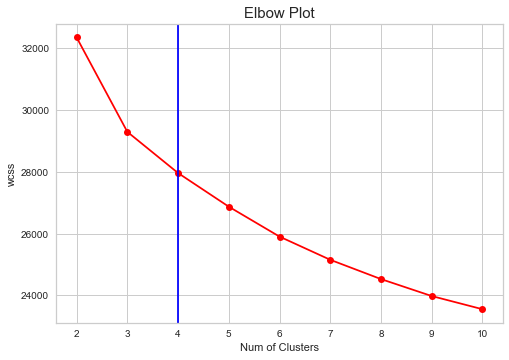

In [41]:
plt.plot(range(2,11),wcss,marker='o',color='red')
plt.title('Elbow Plot', fontsize = 15)
plt.ylabel('wcss')
plt.xlabel('Num of Clusters')
plt.axvline(x = 4, color = 'blue')
plt.show()

In [42]:
#We can see that the for K = 4, there is an elbow in the plot. 
#Before this elbow point, the WCSS is decreasing rapidly and after K = 4, the WCSS is decreasing slowly.

In [43]:
#Thus we choose K = 4 as the optimal value of k.
Kmeans1=KMeans(n_clusters=4,random_state=4)
kmeans_cluster = Kmeans1.fit_predict(df2)

In [44]:
df_kmeans=data1.copy()#making copy of the original dataframe

In [45]:
kmeans_cluster#checking

array([3, 0, 3, ..., 1, 3, 0])

In [46]:
#Build the clusters

In [47]:
df_kmeans['Cluster_Kmeans']=kmeans_cluster
df_kmeans.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Amount,Kids_Teen,TotalAcceptedCmp,Enrollment_Days,Age,Cluster_Kmeans
0,Graduation,Single,58138.0,58,635,88,546,172,88,88,...,8,10,4,7,1617,0,0,997,64,3
1,Graduation,Single,46344.0,38,11,1,6,2,1,6,...,1,1,2,5,27,2,0,151,67,0
2,Graduation,Together,71613.0,26,426,49,127,111,21,42,...,8,2,10,4,776,0,0,498,56,3
3,Graduation,Together,26646.0,26,11,4,20,10,3,5,...,2,0,4,6,53,1,0,91,37,0
4,PhD,Married,58293.0,94,173,43,118,46,27,15,...,5,3,6,5,422,1,0,347,40,2


In [48]:
df_kmeans['Cluster_Kmeans'].value_counts()

0    1027
2     556
3     466
1     191
Name: Cluster_Kmeans, dtype: int64

#### 7. Cluster Analysis (cluster wise)

In [49]:
#Cluster 1

In [50]:
# statistical summary of the numerical variables
df_kmeans[df_kmeans['Cluster_Kmeans']==0].describe()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Amount,Kids_Teen,TotalAcceptedCmp,Enrollment_Days,Age,Cluster_Kmeans
count,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.0
mean,35235.965207,49.574489,39.701071,4.968841,22.043817,6.960078,5.103213,14.941577,1.945472,2.038948,0.549172,3.191821,6.368062,93.718598,1.220058,0.085686,496.857838,49.632911,0.0
std,14677.486552,29.056124,48.375332,7.712614,22.857151,9.701257,7.448004,18.563428,1.308596,1.196340,0.757205,1.069337,2.036430,82.134142,0.703837,0.290291,228.455615,11.442398,0.0
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,26.000000,25.000000,0.0
25%,25890.500000,24.500000,8.000000,0.000000,7.000000,0.500000,0.000000,4.000000,1.000000,1.000000,0.000000,3.000000,5.000000,38.000000,1.000000,0.000000,311.500000,42.000000,0.0
50%,34596.000000,49.000000,21.000000,2.000000,14.000000,3.000000,2.000000,9.000000,2.000000,2.000000,0.000000,3.000000,7.000000,63.000000,1.000000,0.000000,485.000000,48.000000,0.0
75%,43019.000000,76.000000,53.000000,6.000000,26.500000,10.000000,7.000000,20.000000,2.500000,3.000000,1.000000,4.000000,8.000000,124.500000,2.000000,0.000000,665.000000,57.000000,0.0
max,162397.000000,99.000000,301.000000,65.000000,168.000000,80.000000,66.000000,262.000000,15.000000,8.000000,5.000000,8.000000,20.000000,442.000000,3.000000,2.000000,1089.000000,128.000000,0.0


In [51]:
# summary of the categorical variable
df_kmeans[df_kmeans['Cluster_Kmeans']==0].describe(include='object')

,Education,Marital_Status
count,1027,1027
unique,5,6
top,Graduation,Married
freq,505,405


In [52]:
#The following information can be deduced about the Above cluster 0

#Average Age is 49
#Mostly are married and in Graduation level in this cluster
#Total amount spent is between 5.0 to 442.0
#Average Income is 35235.9

In [53]:
#Cluster 2

In [54]:
# statistical summary of the numerical variables
df_kmeans[df_kmeans['Cluster_Kmeans']==1].describe()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Amount,Kids_Teen,TotalAcceptedCmp,Enrollment_Days,Age,Cluster_Kmeans
count,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.0
mean,85089.196349,52.010471,905.884817,48.842932,507.534031,74.717277,58.769634,66.842932,1.251309,5.439791,6.345550,8.261780,3.235602,1662.591623,0.209424,1.926702,548.036649,51.183246,1.0
std,44588.065456,29.702204,330.802529,46.237219,305.595584,62.358502,50.140952,58.231990,1.622112,2.313641,3.429895,2.911783,2.037023,403.883674,0.479161,0.986685,225.235932,13.562834,0.0
min,48192.000000,1.000000,1.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,62.000000,0.000000,0.000000,30.000000,26.000000,1.0
25%,75435.000000,25.000000,712.500000,19.000000,279.500000,27.500000,20.000000,24.000000,1.000000,4.000000,4.000000,6.000000,2.000000,1438.000000,0.000000,1.000000,382.000000,40.000000,1.0
50%,82332.000000,56.000000,962.000000,31.000000,455.000000,56.000000,43.000000,44.000000,1.000000,5.000000,6.000000,8.000000,3.000000,1686.000000,0.000000,2.000000,542.000000,50.000000,1.0
75%,87934.000000,78.000000,1123.500000,62.000000,733.000000,107.000000,90.000000,95.500000,1.000000,7.000000,8.000000,10.500000,5.000000,1927.000000,0.000000,3.000000,698.500000,62.500000,1.0
max,666666.000000,99.000000,1493.000000,190.000000,1725.000000,250.000000,194.000000,241.000000,15.000000,11.000000,28.000000,13.000000,9.000000,2525.000000,3.000000,4.000000,1089.000000,80.000000,1.0


In [55]:
# summary of the categorical variable
df_kmeans[df_kmeans['Cluster_Kmeans']==1].describe(include='object')

,Education,Marital_Status
count,191,191
unique,4,5
top,Graduation,Married
freq,87,74


In [56]:
#The following information can be deduced about the Above cluster 1

#Average Age is 51
#Mostly are married people in this cluster
#Total amount spent is between 62.00 to 2525.00
#Average Income is 85089

In [57]:
#Cluster 3

In [58]:
# statistical summary of the numerical variables
df_kmeans[df_kmeans['Cluster_Kmeans']==2].describe()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Amount,Kids_Teen,TotalAcceptedCmp,Enrollment_Days,Age,Cluster_Kmeans
count,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.0
mean,56099.365570,47.541367,435.794964,18.363309,123.492806,25.070144,18.744604,56.034173,4.039568,6.334532,2.830935,7.503597,6.053957,677.500000,1.232014,0.232014,602.760791,56.196043,2.0
std,10876.008949,28.493212,262.931843,21.948285,84.514032,29.465945,24.540451,51.284305,2.347753,2.430207,1.830723,2.600413,1.791060,315.967363,0.595887,0.474712,227.516103,10.012571,0.0
min,4428.000000,0.000000,7.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,215.000000,0.000000,0.000000,27.000000,29.000000,2.0
25%,49139.000000,24.000000,230.750000,3.000000,65.750000,4.000000,3.000000,19.000000,2.000000,5.000000,2.000000,5.000000,5.000000,428.750000,1.000000,0.000000,442.000000,48.000000,2.0
50%,56866.500000,48.000000,375.500000,10.000000,102.000000,15.000000,10.000000,38.000000,4.000000,6.000000,2.000000,7.000000,6.000000,602.500000,1.000000,0.000000,621.500000,56.000000,2.0
75%,63841.000000,70.000000,595.000000,25.000000,161.000000,37.000000,25.000000,78.000000,5.000000,8.000000,4.000000,9.000000,8.000000,885.500000,2.000000,0.000000,774.250000,65.000000,2.0
max,86358.000000,99.000000,1349.000000,138.000000,650.000000,223.000000,157.000000,321.000000,15.000000,25.000000,11.000000,13.000000,10.000000,1804.000000,3.000000,2.000000,1087.000000,78.000000,2.0


In [59]:
# summary of the categorical variable
df_kmeans[df_kmeans['Cluster_Kmeans']==2].describe(include='object')

,Education,Marital_Status
count,556,556
unique,5,7
top,Graduation,Married
freq,255,216


In [60]:
#The following information can be deduced about the Above cluster 3

#Average Age is 56
#Mostly are married people in this cluster
#Total amount spent is between 215.0 to 1804.00
#Average Income is 56099

In [61]:
#Cluster 4

In [62]:
# statistical summary of the numerical variables
df_kmeans[df_kmeans['Cluster_Kmeans']==3].describe()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Amount,Kids_Teen,TotalAcceptedCmp,Enrollment_Days,Age,Cluster_Kmeans
count,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.0
mean,71680.736063,48.766094,482.225322,73.551502,398.557940,104.504292,72.388412,84.424893,1.555794,5.354077,5.607296,8.459227,2.972103,1215.652361,0.324034,0.175966,547.497854,53.478541,3.0
std,10548.754902,28.977541,239.711472,50.107739,217.807723,64.992415,52.127030,62.679795,1.282680,2.668243,2.628682,2.959848,1.816672,359.152358,0.486530,0.392321,230.486706,13.119163,0.0
min,2447.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,277.000000,0.000000,0.000000,27.000000,26.000000,3.0
25%,65884.500000,24.000000,303.250000,32.000000,227.250000,50.000000,32.000000,35.000000,1.000000,4.000000,4.000000,6.000000,2.000000,961.500000,0.000000,0.000000,372.250000,43.000000,3.0
50%,72174.500000,50.000000,445.000000,66.000000,376.500000,94.500000,59.000000,65.500000,1.000000,5.000000,5.000000,8.000000,3.000000,1169.000000,0.000000,0.000000,565.500000,53.000000,3.0
75%,78937.000000,73.000000,620.750000,107.750000,532.500000,150.000000,107.000000,123.500000,2.000000,7.000000,7.000000,11.000000,4.000000,1463.250000,1.000000,0.000000,718.750000,63.000000,3.0
max,113734.000000,99.000000,1218.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,9.000000,2352.000000,2.000000,2.000000,1089.000000,122.000000,3.0


In [63]:
# summary of the categorical variable
df_kmeans[df_kmeans['Cluster_Kmeans']==3].describe(include='object')

,Education,Marital_Status
count,466,466
unique,5,6
top,Graduation,Married
freq,280,169


In [64]:
#The following information can be deduced about the Above cluster 4

#Average Age is 53
#Mostly are married people in this cluster
#Total amount spent is between 277.0 to 2352.0
#Average Income is 71680

In [65]:
#Conclusion

#some recommendations for the company based on our analysis:

#In the cluster 1 the total count of DealsPurchases are more that means people who sepnt money between 5.0 to 467.0
#and who have the least average income less go for the deals realted stuff
#so company could work more on such kind of deals to increase more revenue

#In the cluster 1 average people purchasing fruits is less as compared to the other, maybe because its too costly for them
#as their average income is less, so deals on this may increase the revenue


#Wine and meat products are very popular amongst all the clusters. 
#It would be great to offer some deals and more variants in this categories

#Amount spend on the sweet prodcuts is less overall in all custers, 
#so maybe testing centre of sweets or free samples and some new varitites may increase the amount


#For the loyal customers who visit store every month or in 15 days need to be get some benefits to protect or save
#them for longer time

In [66]:
#-----------------------------------------------------END-------------------------------------------------#